<a href="https://colab.research.google.com/github/valyaler/innopolis/blob/master/%D0%94%D0%97_11_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 9.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


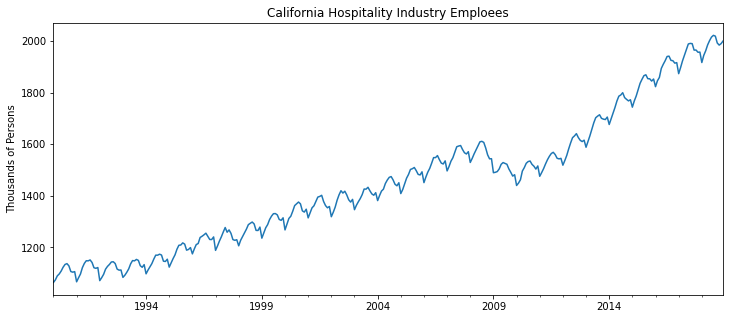

In [ ]:
df['Employees'].plot(figsize=(12,5),ylabel='Thousands of Persons',xlabel='',title='California Hospitality Industry Emploees')

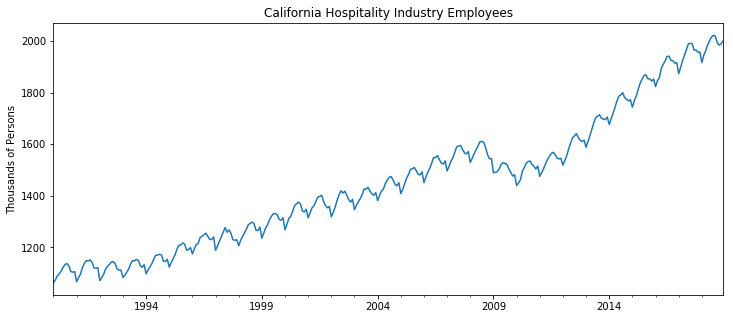

In [ ]:
# 

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').

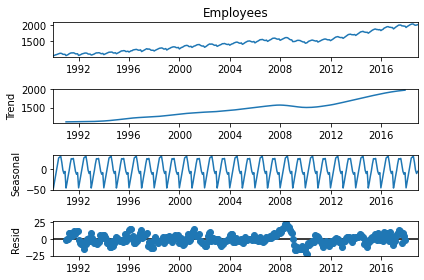

In [ ]:
r = seasonal_decompose(df['Employees'],model='additive',period=24) #я сдаюсь... не получается
r.plot();

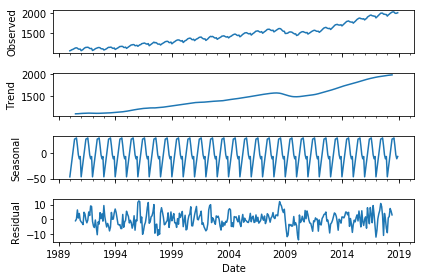

In [ ]:
# 

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [ ]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Wed, 15 Dec 2021   AIC                           2208.504
Time:                                      13:04:02   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.569      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.471      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.140      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    703.740      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2997      1.717     17.062      0.000      25.934      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
### 4. Разделите данные на train/test 
Установите один год (12 записей) для тестирования. Есть несколько способов сделать это!

In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train

In [ ]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Wed, 15 Dec 2021   AIC                           2128.116
Time:                                      13:04:41   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.264      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.602      0.000      -1.097      -0.820
ma.L2          0.1498      0.061      2.462      0.014       0.031       0.269
ar.S.L12       0.9973      0.001    729.934      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.157      0.000      -0.838      -0.666
sigma2        28.7621      1.684     17.079      0.000      25.461      32.063
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#изменим параметры с ожидаемым внизу результатом, то есть SARIMAX(0, 1, 0)x(2, 0, 0, 12)
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12)) #изменяем параметры
results = model.fit()
results.summary()

#В результате видим изменения информационных объектов после изменения параметров модели

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 15 Dec 2021   AIC                           2196.814
Time:                                    13:04:51   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [ ]:
#Получаем предсказанные значения и пытаемся оценить качество прогноза
start=len(train) #первая точка в тестовом множестве
end=len(train)+len(test)-1 #последняя точка в тестовом множеств

#предсказываем значения,передав модели results точку начала и окончания
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

- dynamic=False - прогноз при использовании полной истории до точки прогнозирования
- typ='levels' - уровни исходных эндогенных переменных (linear - разностные эндогенные переменные)

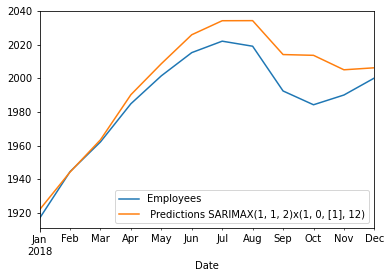

In [ ]:
#Сравниваем результаты
test['Employees'].plot(legend=True)
predictions.plot(legend=True)

### 7. Нарисуйте графики прогнозируемых и известных значений


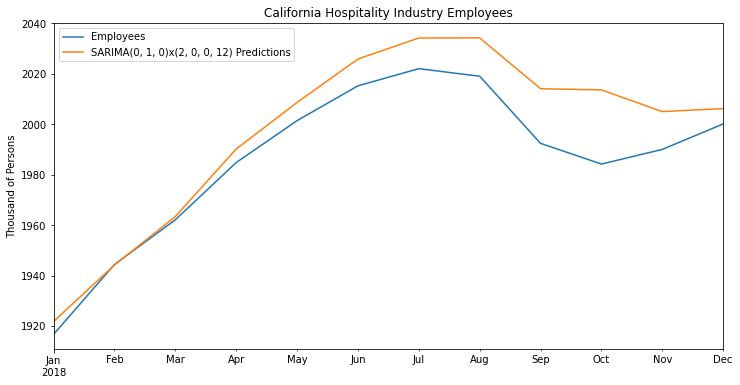

In [ ]:
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0, 1, 0)x(2, 0, 0, 12) Predictions')
test['Employees'].plot(legend=True, figsize=(12,6), xlabel='' , ylabel='Thousand of Persons', title='California Hospitality Industry Employees')
predictions.plot(legend=True)

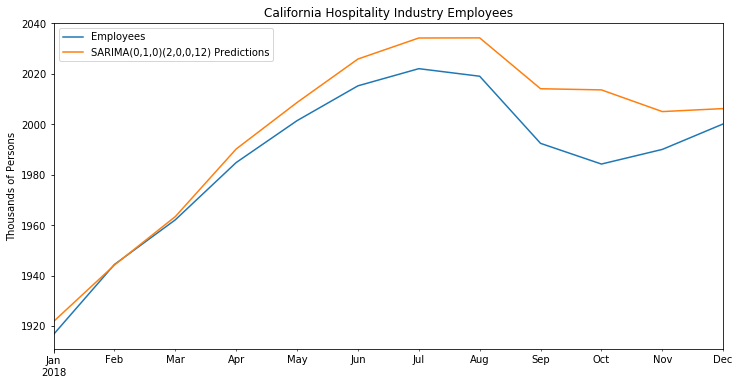

SARIMA(0,1,0)(2,0,0,12) MSE Error: 77.64833237
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 8.811829116


In [ ]:
#Оцениваем модель методом MSE (Среднеквадратическая ошибка Mean Square Error) и RMSE (Среднеквадратическое отклонение Root Mean Square Error)
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

mse_error = mean_squared_error(test['Employees'], predictions)
rmse_error = rmse(test['Employees'], predictions)

print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}') #квадрат от единиц измерения 11 - кол-во символов (с точкой), 10 - после точки (сколько оставнется, но макс 10) 
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}') #единицы те же, что и само измерение

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506597
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222836


### 8. Оцените качество модели с помощью MSE и RMSE


! Рассчитываем качество прогноза с помощью:

MSE (Mean Squared Error) - представляет собой разницу между исходным и прогнозируемым значениями, которые извлекаются путем возведения средней разницы по набору данных. Это мера того, насколько приближена подогнанная линия к фактическим точкам данных. Чем меньше Средняя квадратная ошибка, тем ближе подходит к набору данных. MSE имеет единицы измерения в квадрате всего, что построено на вертикальной оси.

RMSE (Root Mean Squared Error) - это частота ошибок на квадратный корень MSE. RMSE является наиболее легко интерпретируемой статистикой, так как она имеет те же единицы, что и количество, нанесенное на вертикальную оси или ось Y.

In [ ]:
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {error2:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.64833237
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.811829116


In [ ]:
#получаем результат по новой модели
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}') 
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}') 

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506597
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222836


SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [ ]:
model = SARIMAX(df['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.677
Date:                            Wed, 15 Dec 2021   AIC                           2275.353
Time:                                    13:07:56   BIC                           2286.901
Sample:                                01-01-1990   HQIC                          2279.951
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5293      0.040     13.352      0.000       0.452       0.607
ar.S.L24       0.4297      0.041     10.416      0.000       0.349       0.511
sigma2        37.3116      2.152     17.335      0.000      33.093      41.530
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                51.83
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#задаем точки следующего года
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMA(0, 1, 0)x(2, 0, 0, 12) Forecast ')

### 10. Постройте график предсказаний и график исходных данных


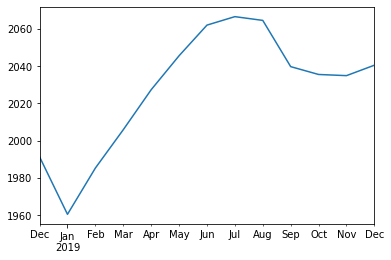

In [ ]:
#Посмотрим на forecast для всего датасета на год вперед
fcast.plot()

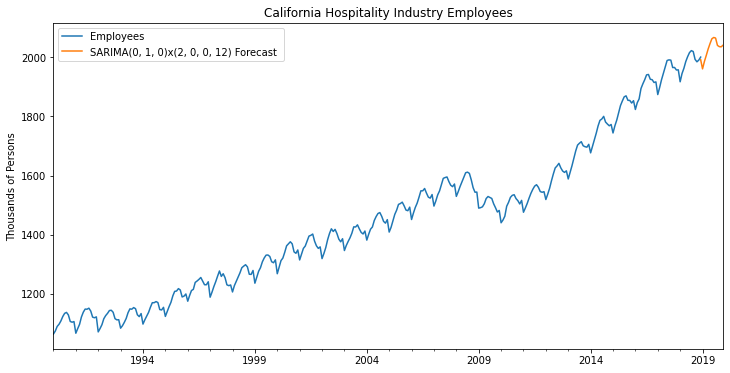

In [ ]:
#Строим графики
ax = df['Employees'].plot(legend=True, figsize=(12,6), xlabel='', ylabel='Thousands of Persons', title = 'California Hospitality Industry Employees') 
fcast.plot(legend=True)

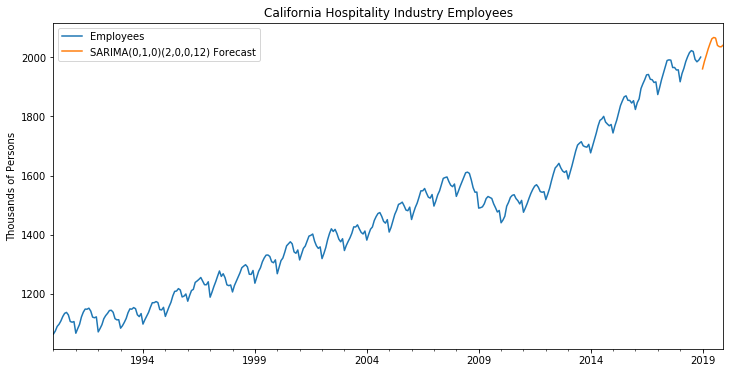

### Бонус: воспользуйтесь библиотекой Prophet для предсказания на 1 год вперед

### Бонус: воспользуйтесь библиотекой Prophet для предсказания на 1 год вперед

Prophet — очень популярная библиотека от компании Facebook для анализа и прогнозирования временных рядов. 

- просто настраиваются прогнозные модели
- можно полностью довериться алгоритму и использовать его как «черный ящик»
- можно очень детально настроить множество параметров, которые доступны в алгоритме  

__Модель__ — это алгоритм или набор алгоритмов, которые строятся на основании данных и с помощью которого/которых мы сможем прогнозировать.

__Посмотрим [документацию](https://facebook.github.io/prophet/docs/quick_start.html)__



In [ ]:
#посмотрим еще раз на наш датасет
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [ ]:
#выделим тестовую (последний год) и обущающую (до последнего года) выборку
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [ ]:
#посмотрим на обущающую выборку
train.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [ ]:
#посмотрим на тестовую выборку
test.head()

,Employees
Date,
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5


Установим и импортируем `Prophet()`.

!Если профет не установился через 

`!pip install pystan
 !pip install fbprophet`

пишите мне

In [ ]:
!pip install pystan 
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

Сначала попробуем построить прогнозную модель без указания каких бы то ни было параметров — пусть алгоритм действует на свое усмотрение.

__Параметры__ — это настройки модели. Обученная модель фиксирует ряд настроек, и мы на этапе обучения можем подсказать ей, как настраиваться или оставить настройки  «по умолчанию» . 

Чтобы создать модель, мы используем 
1. объект `Prophet()` из библиотеки

2. метод `.fit()` для подгонки модели
3. правильно подготовленные данные


Создадим `model`, присвоив ей объект `Prophet()`

In [ ]:
model = Prophet()
model

`.fit()` — метод подгонки модели под заданные данные и параметры модели

Нужно, чтобы в метод `.fit()` подавался датафрейм с нужными полями. Заглянем еще раз в [документацию.](https://facebook.github.io/prophet/docs/quick_start.html)
- `ds` — временная гранула, в нашем случае месяц

- `y` — значения, которые будем предсказывать, в нашем случае кол-во сотрудников

In [ ]:
train_0 = train.reset_index() #Индекс сбросим, чтобы работать только с колонками.
test_0 = test.reset_index() #Индекс сбросим, чтобы работать только с колонками.

In [ ]:
train_0.head() #посмотрим преобразование после сброса индексов

,Date,Employees
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [ ]:
# Переименуем столбцы в обучающем и тестовом датасетах, чтобы они подходили для использования методов Prophet
train_0.columns = ['ds', 'y'] # переименовали столбцы
test_0.columns = ['ds', 'y'] # переименовали столбцы

In [ ]:
train_0.head() #посмотрим преобразование после переименования колонок

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [ ]:
model.fit(train_0) # подогнали модель под наши данные

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Как видим, алгоритм сам нам подсказывает, что он проигнорировал, выбирая параметры  

1. `Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.`

    - недельную сезонность (*для недельной сезонности нам нужно иметь данные минимум за месяц, чтобы суметь использовать ее в модели*)


2. `INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.`

    - дневную сезонность (*дневная сезонность может использоваться в случае, если данные собираются по часам/минутам, в нашем случае данные представлены по месяцам*).


Зато он обнаружил годовую сезонность и использовал его при настройке модели.


## Качество модели

Посмотрим на качество получившейся модели. Для этого нам необходимо задать горизонт прогнозирования (в нашем случае это год) и создать дата-фрейм с датами из «будущего», для которого модель потом будет строить прогноз.

`make_future_dataframe()` — метод профета, который создает дата-фрейм с временным периодом будущего. В аргумент ему мы передаем `periods` и задаем количество элементов, на которые хотим получить прогноз. 

Так как наши данные имеют месячную гранулярность, прогноз мы также получим по месяцам от последней даты на количество месяцев, указанное в скобках.

In [ ]:
future = model.make_future_dataframe(periods=12, freq='MS') # говорим профету сделать дата-фрейм на 12 месяцев
future.tail(12) # выводим 12 строк с конца

Теперь можем построить прогноз методом __`.predict`__.

Применим его к нашей модели и запишем в отдельную переменную.

доверительный интервал по умолчанию 95%, это популярный стандарт, который вполне нас устраивает

In [ ]:
forecast = model.predict(future)
forecast.head() # возвращает много колонок

Основные поля в прогнозе следующие:
- `ds` — дата прогноза

- `yhat` — спрогнозированное значение

- `yhat_lower` — нижняя граница доверительного интервала для прогноза
- `yhat_upper` — верхняя граница доверительного интервала для прогноза

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # оставим только нужные

Также с помощью метода `.plot()` прогноз можно построить на графике и посмотреть визуально его адекватность.

Черные точки — наши данные.

In [ ]:
model.plot(forecast);

Кроме того, Prophet позволяет также наглядно разложить ряд на основные компоненты — тренд и сезонность:

`plot_components()` — возвращает несколько графиков, среди которых тренд и столько сезонностей, сколько он найдет.

Точка с запятой в конце строки позволяет не выводить лишнего. Обычно такая проблема возникает с графиками — выводится лишняя информация или даже дублирующиеся графики.

`Suppress output
Put a ‘;’ at the end of a line to suppress the printing of output. This is useful when doing calculations which generate long output you are not interested in seeing. It also keeps the object out of the output cache, so if you’re working with large temporary objects, they’ll be released from memory sooner.`

In [ ]:
model.plot_components(forecast);

Видим, что тренд у кол-ва сотрудников возрастающий и у нас есть четкая годовая сезонность:
- меньше всего в середине февраля
- среди месяцев больше всего кол-ва сотрудников в июне и августе

## Ошибка прогноза

Давайте посмотрим, какая получилась ошибка прогноза. По модели мы строим прогноз на тестовый период, затем сравниваем его с контрольными данными и считаем отклонение.

### Как посчитать отклонение?

Ошибку прогноза мы посчитаем с помощью функции `mean absolute error()` — среднее значение модулей отклонений прогноза от факта — из библиотеки `scikit-learn`:

В аргументы он принимает серию предсказанных значений и серию с контрольными значениями.  

Что под капотом у функции: из факта вычитаем прогноз, берем от этого модуль (положительное значение) и считаем среднее значение по всем модулям. 


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast['yhat'].tail(12), test_0['y']) 

Сходу не понять, сильное ли отклонение мы получили. Посмотрим в %.

Для того чтобы посчитать `отклонение в процентах`, необходимо `модули отклонений прогноза от факта` разделить на `факт`, от полученных значений посчитать среднее арифметическое и умножить на 100.

`np.mean()` — функция библиотеки NumPy считает среднее арифметическое

`np.abs()` — функция библиотеки NumPy, которая вернет модули

In [ ]:
modul_dif = np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y']) # положим модули отклонений от прогноза в отдельную переменную

dif = np.mean(modul_dif/test_0['y']) # считаем среднее арифметическое отклонение 

dif_percent = dif*100 # получаем процент

dif_percent

Или все то же самое можно записать в одну строку

In [ ]:
np.mean(np.abs(forecast.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

NameError: name 'np' is not defined

Итого, отклонение на 2.5%

## Настройка параметров модели

Мы запускали модель без параметров, давайте посмотрим, какие параметры модели можно задать. Рассмотрим основные:
- __`growth`__ — тренд 
    - `linear` — линейный, то есть данные растут или убывают равномерно
    
    - `logistic` — логистический сложносочиненный микс динамики данных
    
    
- __`holidays`__ — дата-фрейм с описанием праздников/выходных дней, чтобы они учитывались при построении прогноза


- __`seasonality`__ — сезонность

    - `weekly_seasonality` — недельная сезонность 

    - `daily_seasonality` — дневная сезонность 

    - `yearly_seasonality` — годовая сезонность 
    

- __`seasonality_mode`__ 
    - `multiplicative` — мультипликативная 
    - `additive` — аддитивная
    
Аддитивную сезонность имеет смысл использовать, если амплитуда колебаний сезонности из года в год не меняется. Если амплитуда колебаний сезонности из года в год меняется (т. е. размах уменьшается или увеличивается), то используем мультипликативную сезонность.

Вытащим тренд и обозначим, что у нас мультипликативная сезонность

In [ ]:
model_1 = Prophet(growth = 'linear', yearly_seasonality = True, seasonality_mode='additive') #создаем объект модели профет
model_1.fit(train_0) #прогоняем новую модель через набор данных

future_1 = model_1.make_future_dataframe(periods=12, freq='MS') # говорим профету сделать дата-фрейм на 12 месяцев
forecast_1 = model_1.predict(future_1) #предсказываем значения по новой модели
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(12), test_0['y'])
print('MSE: ', error_forecast_1)

In [ ]:
#Посмотрим в % ошибку прогноза
np.mean(np.abs(forecast_1.tail(12).reset_index()['yhat'] - test_0['y'])/test_0['y'])*100

В результате при настройках модели ошибка составила такой же порог, что означает, что параметры в данном случае модель сама предсказала и установила корректные.

# Задание * :можно построить прогноз на датасете BeerWineLiquor.csv  